In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\Omkar\\Downloads\\diabetes.csv")

In [5]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [6]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

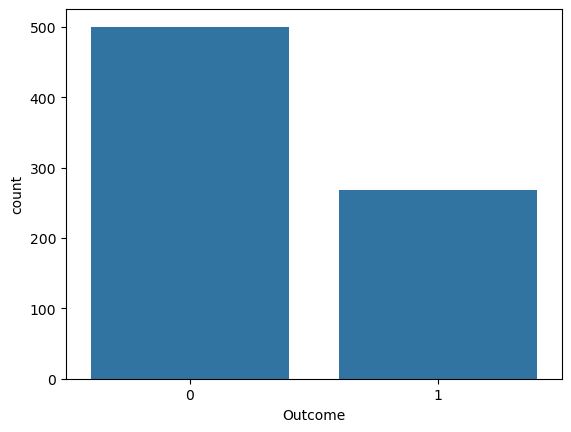

In [7]:
sns.countplot(x=y)
plt.show()

In [8]:
print(y.value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
x_scaled,y,random_state=0,test_size=0.25)


In [11]:
x.shape

(768, 8)

In [12]:
x_train.shape

(576, 8)

In [13]:
x_test.shape

(192, 8)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors =5)

In [16]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [18]:
y_pred = knn.predict(x_test)

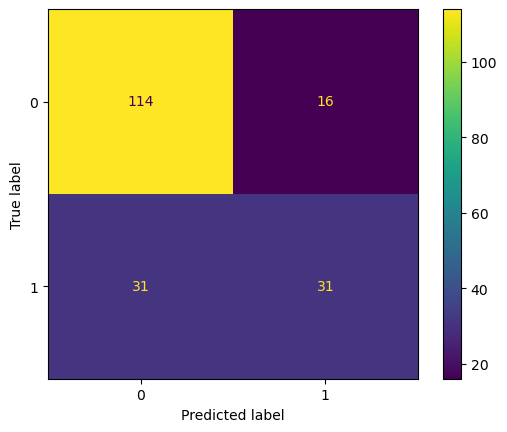

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
error = []
for k in range(1,41): 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(pred != y_test))

In [24]:
error

[0.328125,
 0.2708333333333333,
 0.24479166666666666,
 0.2708333333333333,
 0.24479166666666666,
 0.2552083333333333,
 0.234375,
 0.24479166666666666,
 0.21875,
 0.24479166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.234375,
 0.23958333333333334,
 0.21875,
 0.21354166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.22395833333333334,
 0.22916666666666666,
 0.234375,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.21354166666666666,
 0.22395833333333334,
 0.22916666666666666,
 0.20833333333333334,
 0.22916666666666666,
 0.22916666666666666,
 0.234375,
 0.22395833333333334,
 0.22916666666666666,
 0.22395833333333334,
 0.22395833333333334]

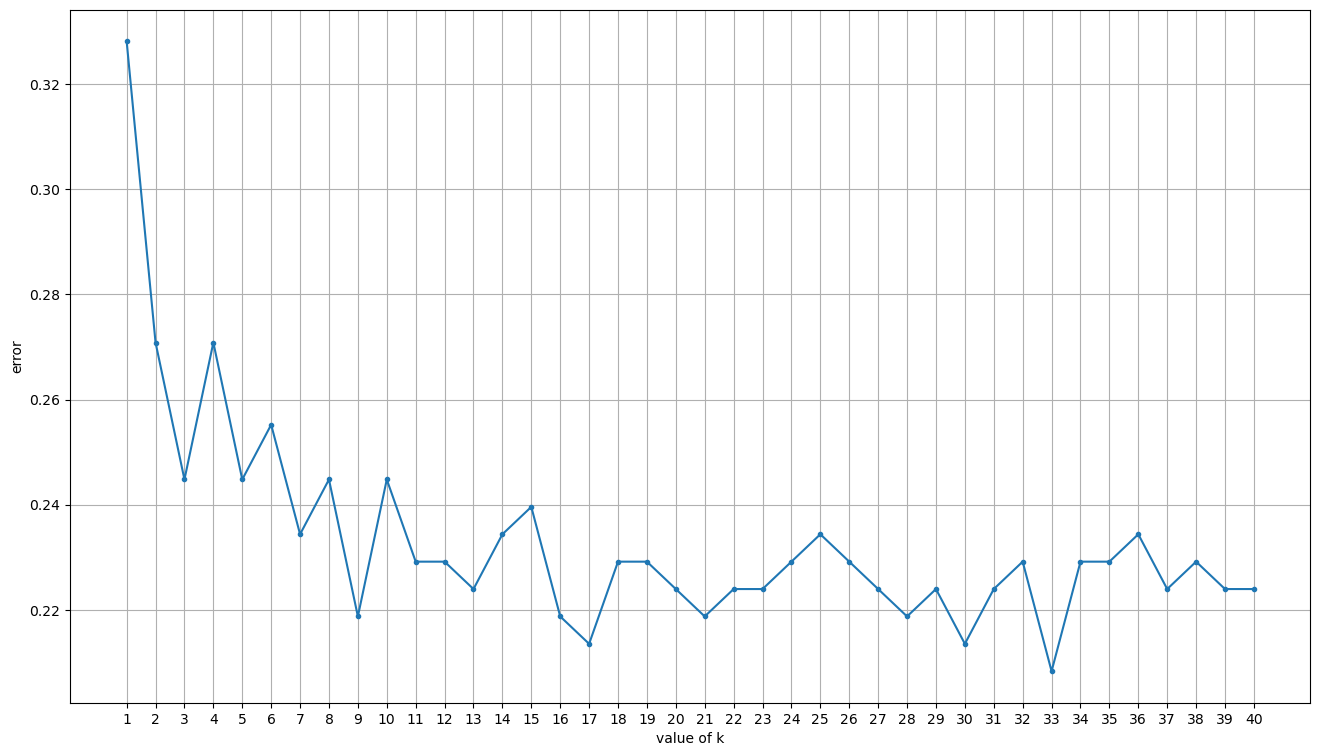

In [25]:
plt.figure(figsize=(16,9))
plt.xlabel('value of k')
plt.ylabel('error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error,marker='.')

In [26]:
knn = KNeighborsClassifier(n_neighbors = 33)

In [27]:
knn.fit(x_train , y_train)


KNeighborsClassifier(n_neighbors=33)

In [28]:
y_pred = knn.predict(x_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192

